In [1]:
import os
import tensorflow.keras as keras
import itertools

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import BatchNormalization

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [ ]:
# BATCH_SIZE = 2

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 2
MOMENTUM = 0.95

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512   

50000/50000 [==============================] - 52s 1ms/sample - loss: 2.2467 - accuracy: 0.1660 - val_loss: 171.9026 - val_accuracy: 0.1736
Epoch 46/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.2397 - accuracy: 0.1664 - val_loss: 192.5529 - val_accuracy: 0.1629
Epoch 47/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.2458 - accuracy: 0.1628 - val_loss: 230.3455 - val_accuracy: 0.1735
Epoch 48/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.2500 - accuracy: 0.1633 - val_loss: 60.6121 - val_accuracy: 0.1657
Epoch 49/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.2493 - accuracy: 0.1614 - val_loss: 45.9324 - val_accuracy: 0.1445
Epoch 50/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.2579 - accuracy: 0.1596 - val_loss: 25.3856 - val_accuracy: 0.1888


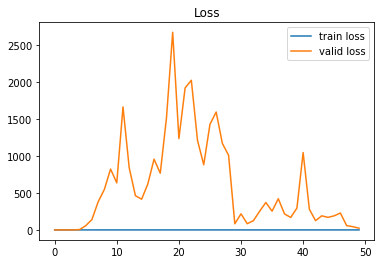

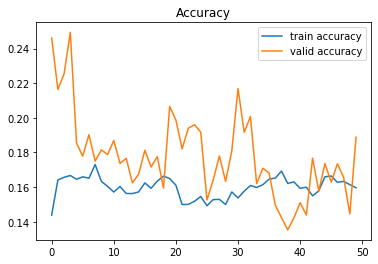

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# BATCH_SIZE = 16

In [11]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 16
MOMENTUM = 0.95

In [12]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512 

50000/50000 [==============================] - 7s 139us/sample - loss: 1.1225 - accuracy: 0.6030 - val_loss: 1.3757 - val_accuracy: 0.5291
Epoch 46/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.1172 - accuracy: 0.6061 - val_loss: 1.3734 - val_accuracy: 0.5237
Epoch 47/50
50000/50000 [==============================] - 7s 138us/sample - loss: 1.1130 - accuracy: 0.6056 - val_loss: 1.3533 - val_accuracy: 0.5336
Epoch 48/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.1070 - accuracy: 0.6050 - val_loss: 1.3871 - val_accuracy: 0.5220
Epoch 49/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.1065 - accuracy: 0.6093 - val_loss: 1.3978 - val_accuracy: 0.5206
Epoch 50/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.1016 - accuracy: 0.6100 - val_loss: 1.3497 - val_accuracy: 0.5409


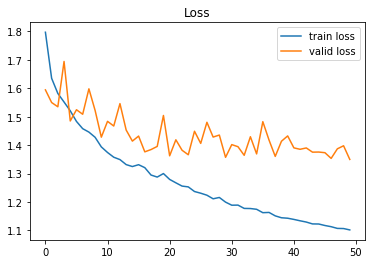

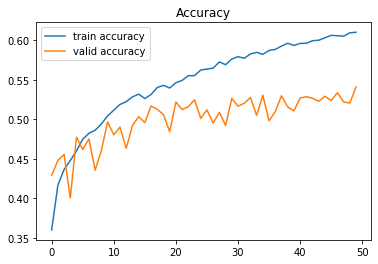

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# BATCH_SIZE = 32

In [14]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
MOMENTUM = 0.95

In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 4s 89us/sample - loss: 0.8288 - accuracy: 0.7021 - val_loss: 1.6363 - val_accuracy: 0.4909
Epoch 47/50
50000/50000 [==============================] - 4s 90us/sample - loss: 0.8161 - accuracy: 0.7082 - val_loss: 1.5353 - val_accuracy: 0.5257
Epoch 48/50
50000/50000 [==============================] - 4s 89us/sample - loss: 0.8027 - accuracy: 0.7133 - val_loss: 1.6198 - val_accuracy: 0.5071
Epoch 49/50
50000/50000 [==============================] - 4s 89us/sample - loss: 0.8018 - accuracy: 0.7134 - val_loss: 1.6111 - val_accuracy: 0.5004
Epoch 50/50
50000/50000 [==============================] - 4s 89us/sample - loss: 0.7996 - accuracy: 0.7132 - val_loss: 1.6692 - val_accuracy: 0.4932


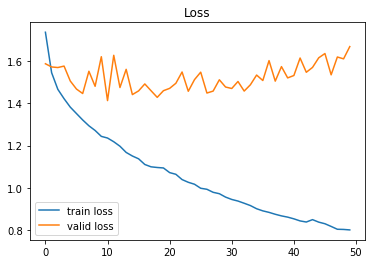

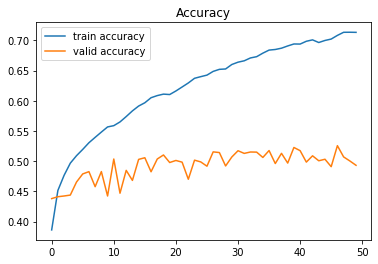

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# BATCH_SIZE = 128

In [17]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95

In [18]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.3067 - accuracy: 0.8959 - val_loss: 2.5358 - val_accuracy: 0.4491
Epoch 47/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2972 - accuracy: 0.8987 - val_loss: 2.4067 - val_accuracy: 0.4695
Epoch 48/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2853 - accuracy: 0.9032 - val_loss: 2.5265 - val_accuracy: 0.4598
Epoch 49/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2750 - accuracy: 0.9061 - val_loss: 2.5760 - val_accuracy: 0.4541
Epoch 50/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2670 - accuracy: 0.9094 - val_loss: 2.4651 - val_accuracy: 0.4663


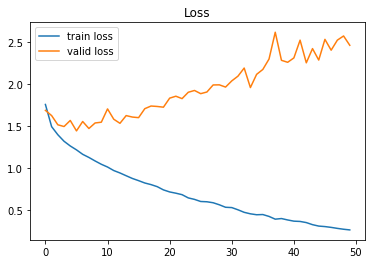

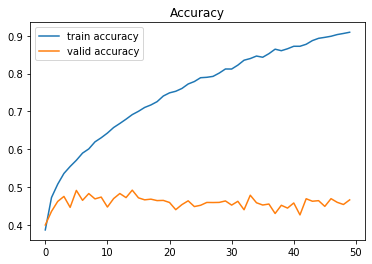

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# BATCH_SIZE = 256

In [20]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [21]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 1s 19us/sample - loss: 0.2091 - accuracy: 0.9405 - val_loss: 2.3044 - val_accuracy: 0.4571
Epoch 47/50
50000/50000 [==============================] - 1s 19us/sample - loss: 0.1978 - accuracy: 0.9449 - val_loss: 2.4964 - val_accuracy: 0.4605
Epoch 48/50
50000/50000 [==============================] - 1s 19us/sample - loss: 0.1887 - accuracy: 0.9474 - val_loss: 2.3188 - val_accuracy: 0.4799
Epoch 49/50
50000/50000 [==============================] - 1s 19us/sample - loss: 0.1802 - accuracy: 0.9507 - val_loss: 2.4770 - val_accuracy: 0.4593
Epoch 50/50
50000/50000 [==============================] - 1s 19us/sample - loss: 0.1685 - accuracy: 0.9548 - val_loss: 2.5188 - val_accuracy: 0.4668


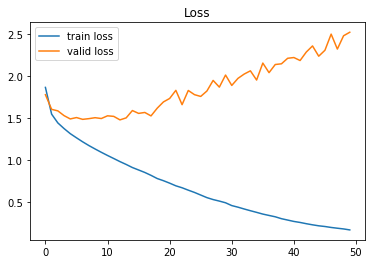

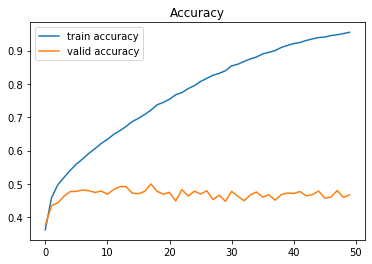

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# BatchNormalization before activation

In [26]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [27]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [28]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               393344    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 406,922
Trainable params: 400,778
Non-trainable params: 6,144
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 18us/sample - loss: 2.1849 - accuracy: 0.2497 - val_loss: 2.0531 - val_accuracy: 0.2691
Epoch 2/50
50000/50000 [========================

50000/50000 [==============================] - 1s 10us/sample - loss: 1.1410 - accuracy: 0.6136 - val_loss: 1.4009 - val_accuracy: 0.5125
Epoch 50/50
50000/50000 [==============================] - 0s 10us/sample - loss: 1.1350 - accuracy: 0.6159 - val_loss: 1.4022 - val_accuracy: 0.5108


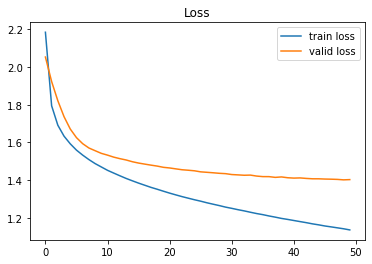

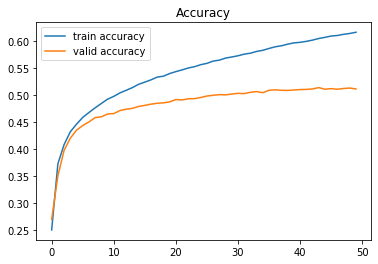

In [29]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# BatchNormalization after input_layer

In [33]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [34]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [35]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 17us

50000/50000 [==============================] - 1s 10us/sample - loss: 1.3654 - accuracy: 0.5240 - val_loss: 1.4326 - val_accuracy: 0.4917
Epoch 49/50
50000/50000 [==============================] - 0s 10us/sample - loss: 1.3591 - accuracy: 0.5256 - val_loss: 1.4278 - val_accuracy: 0.4933
Epoch 50/50
50000/50000 [==============================] - 0s 10us/sample - loss: 1.3528 - accuracy: 0.5288 - val_loss: 1.4285 - val_accuracy: 0.4946


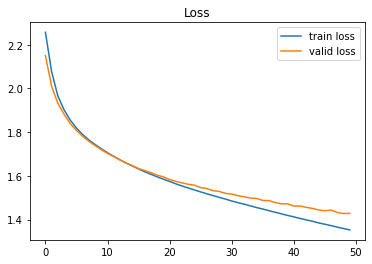

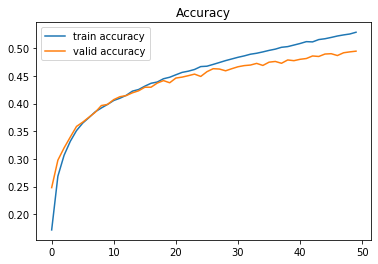

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()